In [1]:
import pandas as pd
import numpy as np

In [4]:
df= pd.read_excel('online_retail_II.xlsx', parse_dates= ['InvoiceDate'], dtype= {
    'Customer ID' : str,
    'Invoice' : str,
    'StockCode' : str
})
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [7]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
df_invoice= df.drop_duplicates(
    subset= ['Invoice'])[['Invoice', 'InvoiceDate','Customer ID']].reset_index(drop= True)
df_invoice.head()

,Invoice,InvoiceDate,Customer ID
0,489434,2009-12-01 07:45:00,13085
1,489435,2009-12-01 07:46:00,13085
2,489436,2009-12-01 09:06:00,13078
3,489437,2009-12-01 09:08:00,15362
4,489438,2009-12-01 09:24:00,18102


In [22]:
def max_purchase_widnow(df):
    customers = df['Customer ID'].unique()
    dff = pd.DataFrame()
    for customer in customers:
        temp_df = df[df['Customer ID'] == customer].sort_values(
            by='InvoiceDate').reset_index(drop=True)
        diff_dates = []
        for i in range(len(temp_df) - 1):
            diff = temp_df.loc[i+1, 'InvoiceDate'] - temp_df.loc[i, 'InvoiceDate']
            diff_dates.append(diff)
            max_diff = np.max(diff_dates)
            dff.loc[customer, 'max_diff'] = max_diff
    return dff

In [25]:
df_max_interval= max_purchase_widnow(df_invoice)
df_max_interval.head()

,max_diff
13085,259 days 03:53:00
13078,21 days 17:18:00
15362,290 days 01:29:00
18102,27 days 20:11:00
12682,40 days 21:50:00


<Axes: xlabel='max_diff', ylabel='Count'>

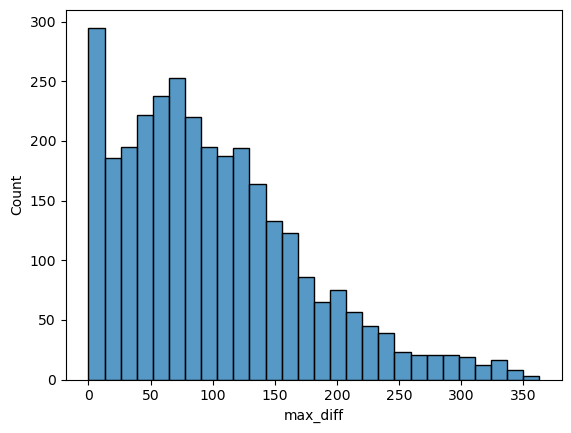

In [29]:
from operator import attrgetter
import seaborn as sns
df_max_interval= df_max_interval['max_diff'].apply(attrgetter('days'))
sns.histplot(df_max_interval)